<a href="https://colab.research.google.com/github/ALEJODATA/testing/blob/master/Pokemon_Speed_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load The Dataset

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d abcsds/pokemon
!unzip pokemon.zip

In [4]:
import pandas as pd

original_df = pd.read_csv('Pokemon.csv')

original_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


#2. Select Feautures#

In [6]:
modified_df = original_df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]

modified_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


#3. Split into 3 Partitions: Train,Val & Test

In [8]:
shuffled_df = modified_df.sample(frac=1) #we don't loose any data, we just moving them around

shuffled_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
258,45,63,37,65,55,95
128,80,92,65,65,80,68
308,70,60,62,80,82,60
216,48,72,48,72,48,48
246,45,60,30,80,50,65


In [9]:
train_df = shuffled_df[:500]
val_df   = shuffled_df[500:650]
test_df  = shuffled_df[650:]

len(train_df), len(val_df), len(test_df)

(500, 150, 150)

In [10]:
X_train, y_train = train_df.to_numpy()[:,:-1],train_df.to_numpy()[:,-1]
X_val, y_val = val_df.to_numpy()[:,:-1],val_df.to_numpy()[:,-1]
X_test, y_test = test_df.to_numpy()[:,:-1],test_df.to_numpy()[:,-1]

#Shows the (rows,columns of X,column in Y)

(X_train.shape,y_train.shape),(X_val.shape, y_val.shape),(X_test.shape, y_test.shape)

(((500, 5), (500,)), ((150, 5), (150,)), ((150, 5), (150,)))

#4. Preprocess The Inputs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3aebe24cd0>,
      dtype=object)

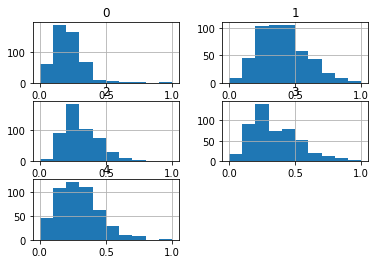

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)

X_train_scaled, X_val_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_val), scaler.transform(X_test)

pd.DataFrame(X_train_scaled).hist()

#5. Pick The Best Model w/ Lowest Validation Error

In [14]:
from sklearn.metrics import mean_absolute_error

average_speed = y_train.mean()

mean_absolute_error(y_val, [average_speed]*len(y_val))

24.764266666666664

In [15]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(X_train, y_train)

mean_absolute_error(y_val, linear_model.predict(X_val))

19.01805215100032

In [16]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor().fit(X_train, y_train)

mean_absolute_error(y_val, random_forest.predict(X_val))

19.029294444444446

In [21]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

model_1 = Sequential([layers.Input((5,)),
                      layers.Dense(1)])

model_1.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mean_absolute_error'])

model_1.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
16/16 [==============================] - 0s 8ms/step - loss: 1633.6927 - mean_absolute_error: 32.0846 - val_loss: 1154.6420 - val_mean_absolute_error: 26.4424
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 1169.5784 - mean_absolute_error: 26.8536 - val_loss: 1100.8174 - val_mean_absolute_error: 25.9012
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 1064.0542 - mean_absolute_error: 25.8593 - val_loss: 1079.8112 - val_mean_absolute_error: 25.8430
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 979.5682 - mean_absolute_error: 24.8518 - val_loss: 997.2452 - val_mean_absolute_error: 24.8640
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 925.6342 - mean_absolute_error: 24.1844 - val_loss: 970.8693 - val_mean_absolute_error: 24.5727
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 888.9569 - mean_absolute_error: 23.7095 - val_loss: 912.7369 - val_mean_abso

In [22]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [18]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

model_2 = Sequential([layers.Input((5,)),
                      layers.Dense(32),
                      layers.Dense(32),
                      layers.Dense(1)])

model_2.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mean_absolute_error'])

model_2.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
16/16 [==============================] - 0s 10ms/step - loss: 2392.9929 - mean_absolute_error: 37.8410 - val_loss: 1224.4246 - val_mean_absolute_error: 26.8858
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 831.7385 - mean_absolute_error: 22.6625 - val_loss: 781.3576 - val_mean_absolute_error: 21.8081
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 780.8298 - mean_absolute_error: 21.9133 - val_loss: 759.5479 - val_mean_absolute_error: 21.2714
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 699.2129 - mean_absolute_error: 20.9291 - val_loss: 708.8672 - val_mean_absolute_error: 20.8974
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 694.8602 - mean_absolute_error: 20.8682 - val_loss: 703.9231 - val_mean_absolute_error: 21.1320
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 707.0366 - mean_absolute_error: 20.5651 - val_loss: 698.5043 - val_mean_absolut

In [20]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                192       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


#6. Evaluate The Chosen Model

In [25]:
mean_absolute_error(y_test,linear_model.predict(X_test))

18.471819482729178